## Training

In [3]:

import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# ───────── 1. 读取数据 ─────────
X_trimmed = np.load('/data/hanzhe/20250424cs/X_trimmed.npy')
y_trimmed = np.load('/data/hanzhe/20250424cs/y_trimmed.npy')

# ───────── 2. 构造二分类标签 ─────────
label_bin = (y_trimmed > 0).astype(int)       # 0: y<=0,  1: y>0

print("原始 y 唯一值:", np.unique(y_trimmed))
print("二分类后计数:", dict(zip(*np.unique(label_bin, return_counts=True))))

# ───────── 3. 监督式 UMAP 训练 ─────────
supervised_reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    target_metric='euclidean',   # 监督模式重点在这里
    random_state=42
)
embedding_sup = supervised_reducer.fit_transform(X_trimmed, y=label_bin)

# ───────── 4. 保存模型和结果 ─────────
output_dir = '/data/hanzhe/20250424cs/umap_supervised'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(supervised_reducer, f'{output_dir}/umap_model_supervised.joblib')
np.save(f'{output_dir}/embedding_supervised.npy', embedding_sup)
np.save(f'{output_dir}/label_bin.npy', label_bin)




原始 y 唯一值: [-1.34921374 -1.25730208 -1.23184218 ...  3.49903587  3.49917218
  3.49946047]
二分类后计数: {np.int64(0): np.int64(478), np.int64(1): np.int64(5000)}


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


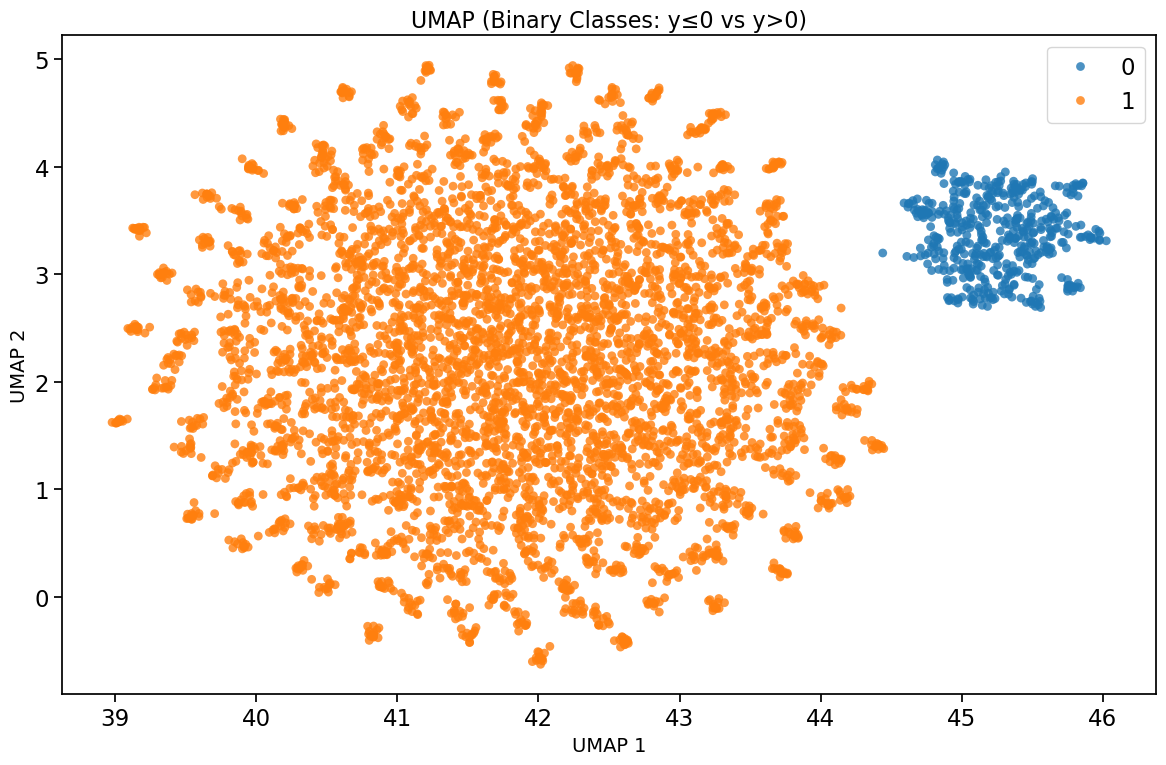

In [5]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/umap_supervised/embedding_supervised.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)

plt.tight_layout()

# ───────── 4. 保存图像 ─────────
out_path = '/data/hanzhe/20250424cs/umap_supervised/umap_scatter_binary.png'
plt.savefig(out_path, dpi=300)
plt.show()



## Inference

In [6]:


import joblib
import numpy as np
import os

# ───────── 1. 路径 ─────────
model_path = '/data/hanzhe/20250424cs/umap_supervised/umap_model_supervised.joblib'
X_path     = '/data/hanzhe/20250424cs/X_trimmed.npy'
save_path  = '/data/hanzhe/20250424cs/umap_supervised/embedding_recomputed.npy'

# ───────── 2. 载入模型和数据 ─────────
umap_model = joblib.load(model_path)     # 已训练好的 UMAP 对象
X_trimmed  = np.load(X_path)             # 原始高维特征

# ───────── 3. 降维 (transform) ─────────
#   transform() 会把新数据映射到模型学到的 2-D 空间
embedding = umap_model.transform(X_trimmed)   # shape: (n_samples, 2)

# ───────── 4. 保存并简单查看 ─────────
np.save(save_path, embedding)

print('降维完成！')



降维完成！


/home/user/anaconda3/envs/gpu/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


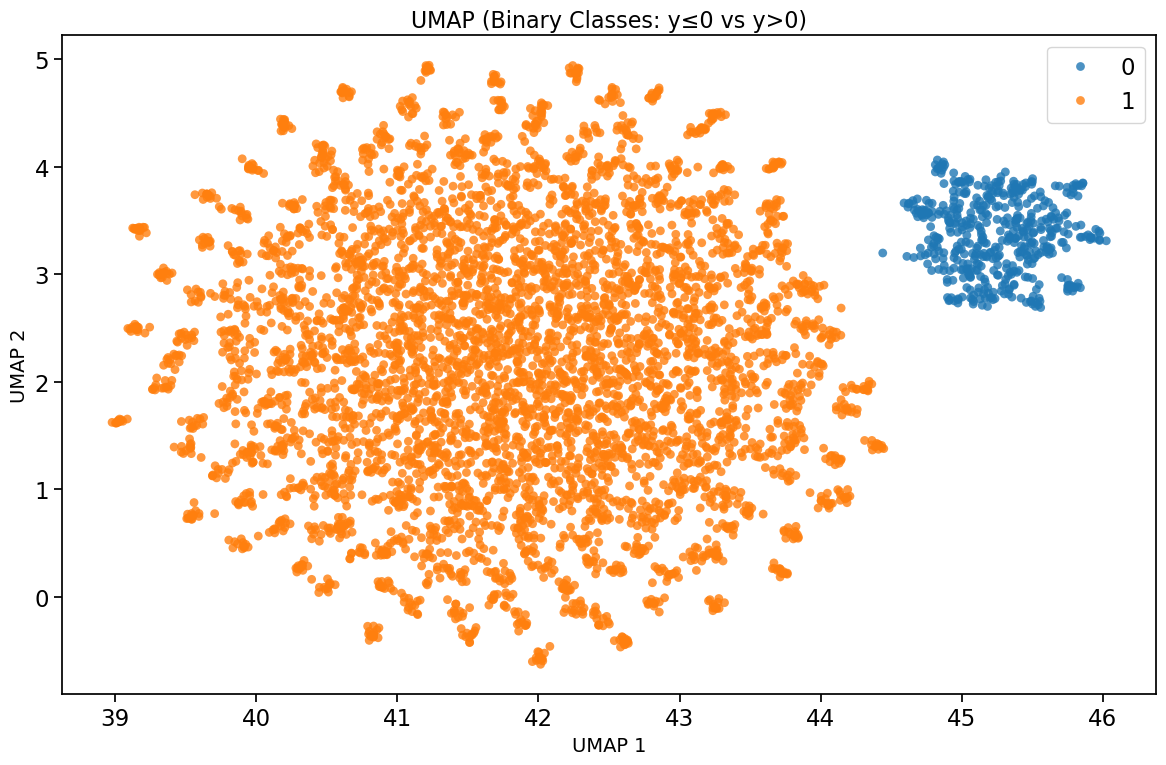

In [7]:
#!/usr/bin/env python
# coding: utf-8
"""
绘制二分类 UMAP 散点图
----------------------------------------
依赖:
  pip install numpy matplotlib seaborn
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────── 1. 读取数据 ─────────
embed_path = '/data/hanzhe/20250424cs/umap_supervised/embedding_recomputed.npy'
y_path     = '/data/hanzhe/20250424cs/y_trimmed.npy'

embedding = np.load(embed_path)          # (n_samples, 2)
y         = np.load(y_path)              # (n_samples,)

# ───────── 2. 压缩为两类 ─────────
#   label_bin = 0  ⇨  y <= 0
#   label_bin = 1  ⇨  y > 0
label_bin = (y > 0).astype(int)

# ───────── 3. 绘图 ─────────
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(12, 8))

palette = {0: "#1f77b4", 1: "#ff7f0e"}    # 两种颜色，可自行调
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=label_bin,
    palette=palette,
    alpha=0.8,
    s=40,
    edgecolor="none"
)

plt.title("UMAP (Binary Classes: y≤0 vs y>0)", fontsize=16)
plt.xlabel("UMAP 1", fontsize=14)
plt.ylabel("UMAP 2", fontsize=14)

plt.tight_layout()


plt.show()

